In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('OnlineRetail (3).csv',encoding = 'unicode_escape')

In [3]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
X=data['CustomerID'].nunique()
X

4372

In [6]:
data.Country.value_counts().reset_index().head(5)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [7]:
data.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


**United Kingdom is  having the most number of orders**

In [8]:
uk_df = data[(data['Country'] == "United Kingdom")]
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


In [9]:
y=uk_df['CustomerID'].nunique()

In [10]:
percentage_uk=(y/X)*100
percentage_uk

90.3476669716377

**90.35% people order from United Kingdom**

In [11]:
uk_df['StockCode'].value_counts()

85123A    2215
85099B    2001
22423     1862
47566     1634
20725     1460
          ... 
72800F       1
72781        1
35015        1
72793        1
90102        1
Name: StockCode, Length: 4065, dtype: int64

In [12]:
uk_product = uk_df.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', \
                                                                                                      ascending=False)
uk_product.head(5)

,StockCode,Description,Quantity
3600,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
4177,85099B,JUMBO BAG RED RETROSPOT,43167
1327,22197,POPCORN HOLDER,34365
3937,84879,ASSORTED COLOUR BIRD ORNAMENT,33679
4203,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32901


In [13]:
groupby_invoice = pd.DataFrame(uk_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of products per Order']
groupby_invoice.describe()

,Number of products per Order
count,23494.000000
mean,20.643867
std,44.068892
min,1.000000
25%,2.000000
50%,9.000000
75%,23.000000
max,1110.000000


**The average number of orders per customer is 1 and average number of products per Order is 9**

In [14]:
data.StockCode.unique().shape

(4070,)

In [15]:
data.Description.unique().shape

(4224,)

From above,it is observed that there can be multiple description for same number of stockcode.

In [16]:
actual_desc=data.groupby(['Description','StockCode']).count().reset_index()
actual_desc.StockCode.value_counts()[actual_desc.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,21181,5


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [19]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
#data=data.loc[data['Quantity']>0] 
data = data[(data.Quantity>0) & (data.UnitPrice>0)]  #Removing the redundancy

In [22]:
data.shape

(530104, 8)

<Axes: >

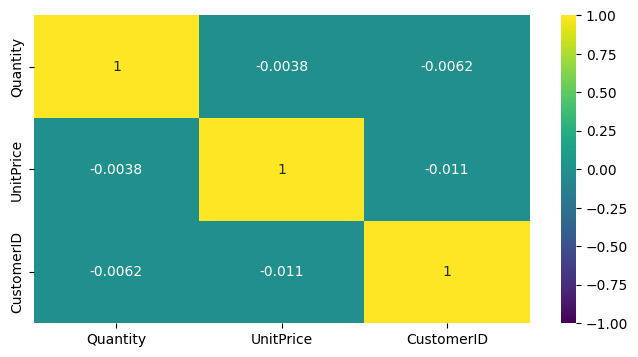

In [23]:
plt.figure(figsize=(8,4),dpi=100)
sns.heatmap(data.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

**By using Recency,Monetary,Frequency (RMF) based model used here to know about the customer segmentation**

In [24]:
HindmostDate= max(data.InvoiceDate)          #To find Recency we are calculating the Hindmost date with Invoice date
HindmostDate

Timestamp('2011-12-09 12:50:00')

In [25]:
HindmostDate=HindmostDate+pd.DateOffset(days=2)
HindmostDate

Timestamp('2011-12-11 12:50:00')

In [26]:
data['Difference']=HindmostDate-data.InvoiceDate

In [27]:
R=data.groupby('CustomerID').Difference.min()            # Finding Recency for the given dataset
R=R.reset_index()                                        #  R as Recency


In [28]:
R.head(5)

,CustomerID,Difference
0,12346.0,327 days 02:49:00
1,12347.0,3 days 20:58:00
2,12348.0,76 days 23:37:00
3,12349.0,20 days 02:59:00
4,12350.0,311 days 20:49:00


In [29]:
data['Amount']=(data.Quantity * data.UnitPrice)            # To find Monetary
data.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Difference,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,375 days 04:24:00,15.3


In [30]:
M=data.groupby('CustomerID').Amount.sum()            # Monetary as M
M=M.reset_index()


In [31]:
M.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [32]:
F=data.groupby('CustomerID').InvoiceNo.count()       # Finding Frequency as F
F=F.reset_index()


In [33]:
F.head(3)

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31


In [34]:
RMF=M.merge(F,on='CustomerID')
RMF=RMF.merge(R,on='CustomerID')

RMF.columns=['CustomerID','M','F','R']

In [35]:
RMF                                               # Recency Monetary Frequency (RMF)

,CustomerID,M,F,R
0,12346.0,77183.60,1,327 days 02:49:00
1,12347.0,4310.00,182,3 days 20:58:00
2,12348.0,1797.24,31,76 days 23:37:00
3,12349.0,1757.55,73,20 days 02:59:00
4,12350.0,334.40,17,311 days 20:49:00
...,...,...,...,...
4333,18280.0,180.60,10,279 days 02:58:00
4334,18281.0,80.82,7,182 days 01:57:00
4335,18282.0,178.05,12,9 days 01:07:00
4336,18283.0,2094.88,756,5 days 00:48:00


In [36]:
RMFdup=RMF.drop('CustomerID',axis=1)                    
RMFdup.R=RMFdup.R.dt.days
RMFdup


,M,F,R
0,77183.60,1,327
1,4310.00,182,3
2,1797.24,31,76
3,1757.55,73,20
4,334.40,17,311
...,...,...,...
4333,180.60,10,279
4334,80.82,7,182
4335,178.05,12,9
4336,2094.88,756,5


In [37]:
RMFdup.loc[0]

M    77183.6
F        1.0
R      327.0
Name: 0, dtype: float64

**Using Standardisation**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale=scaler.fit_transform(RMFdup)

In [39]:
scale

array([[ 8.35866818e+00, -3.96577702e-01,  2.33457414e+00],
       [ 2.50966264e-01,  3.94648958e-01, -9.05340320e-01],
       [-2.85960063e-02, -2.65435162e-01, -1.75359593e-01],
       ...,
       [-2.08742313e-01, -3.48492104e-01, -8.45341904e-01],
       [ 4.51854273e-03,  2.90384290e+00, -8.85340848e-01],
       [-2.41412739e-02, -9.49498596e-02, -4.95351144e-01]])

**MODELING USING K MEANS CLUSTERING**

In [40]:
from sklearn.cluster import KMeans
wcss=[]                                # Within-Cluster Sum of Square
for k in range(1,25):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(scale)
    wcss.append(km.inertia_)


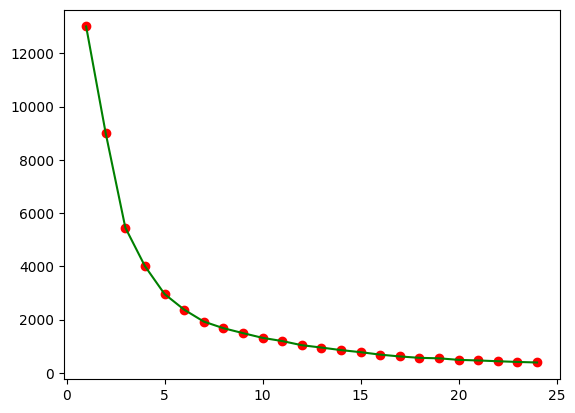

In [41]:
plt.plot(np.arange(1,25),wcss,color='green')
plt.scatter(np.arange(1,25),wcss,color='red')
plt.show()

**Using Elbow Method to find the optimal number of clusters**

In [42]:
model=KMeans(n_clusters=5)
ClusterID=model.fit_predict(scale)

In [43]:
from sklearn.metrics import silhouette_score
sco=silhouette_score(scale,ClusterID)
sco

0.617537882413287

In [44]:
km.labels_

array([ 6, 13, 18, ...,  1, 12,  1])

In [45]:
ClusterID

array([4, 0, 0, ..., 0, 4, 0])

In [46]:
from sklearn.decomposition import PCA

pca=PCA(1)
df=pca.fit_transform(scale)
df.shape

(4338, 1)

In [47]:
df

array([[ 4.03583046],
       [ 0.78744573],
       [-0.12290674],
       ...,
       [-0.01889339],
       [ 2.29034869],
       [ 0.12309927]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


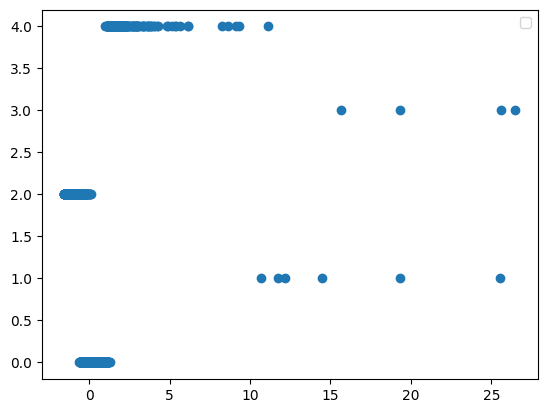

In [48]:
plt.scatter(df,ClusterID)
plt.legend()
plt.show()

In [49]:
df1=pd.DataFrame(scale,columns=['M','F','R'])

df1['Label']=ClusterID
df1.head()

,M,F,R,Label
0,8.358668,-0.396578,2.334574,4
1,0.250966,0.394649,-0.905340,0
2,-0.028596,-0.265435,-0.175360,0
3,-0.033012,-0.081836,-0.735345,0
4,-0.191347,-0.326635,2.174578,2


In [50]:
km_cluster_sale =df1.groupby("Label").M.mean()

In [51]:
km_cluster_Recency =df1.groupby("Label").R.mean()

In [52]:
km_cluster_Frequence =df1.groupby("Label").F.mean()

In [53]:
km_cluster_sale

Label
0    -0.078642
1    21.006354
2    -0.173986
3     7.662387
4     1.115737
Name: M, dtype: float64

<Axes: ylabel='R'>

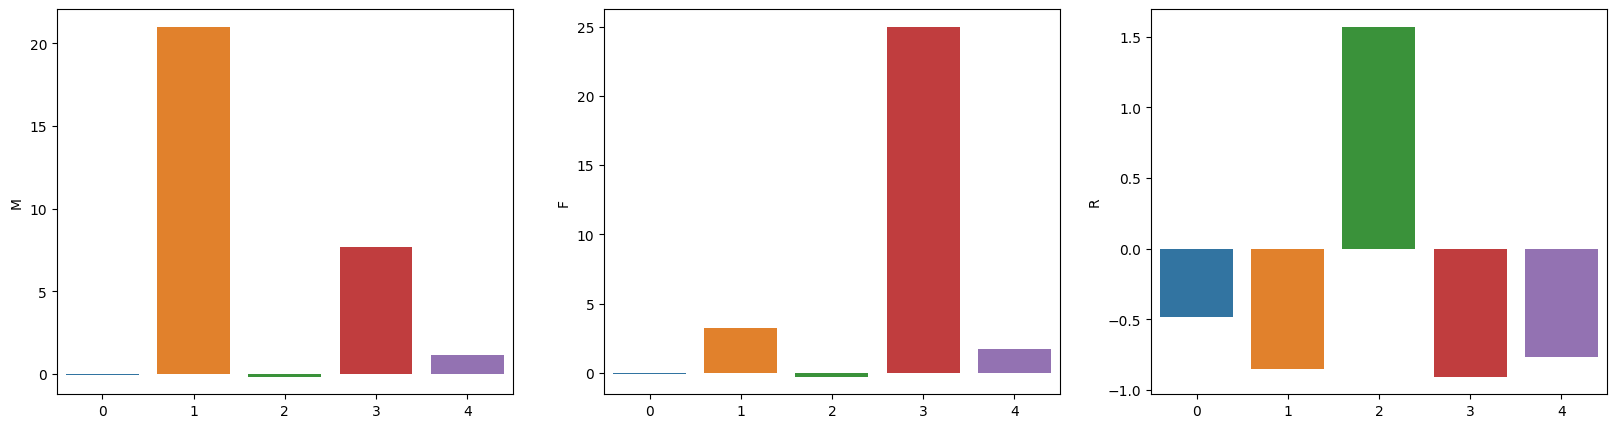

In [54]:
fig, axs = plt.subplots(1,3, figsize = (20, 5))
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_sale , ax = axs[0])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Frequence , ax = axs[1])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Recency , ax = axs[2])

**1)The cluster with label 4 has more Monetary**

**2)The cluster with label 2 has more frequency in point of purchase**

**3)The cluster with label 0 has more recency compared all other clusters since all others have negative in sales.**